In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Modelos lineales
Los modelos lineales son útiles cuando disponemos de pocos datos para espacios de características muy grandes, como en clasificación de textos. Además, son una buena forma de estudiar los métodos de regularización.

# Modelos lineales para regresión

Todos los modelos lineales aprenden un vector que contienen los coeficientes, ``coef_``, y una ordenada en el origen, ``intercept_``, que les permite hacer predicciones usando una combinación lineal de las variables de entrada:

```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_
```

La diferencia entren los modelos lineales para regresión es que tienen restricciones o penalizaciones en el vector ``coef_`` como forma de regularización, además de intentar aproximar bien los datos de entrada.
El modelo lineal más estándar es la regresión de mínimos cuadrados ('*ordinary least squares regression*'), a menudo conocida como regresión lineal. No pone ninguna restricción en ``coef_``, por lo que, cuando el número de características es muy alto, no funciona correctamente y puede resultar en sobre-aprendizaje.

Vamos a hacer una simulación simple para ver el comportamiento de estos modelos:

In [30]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, true_coefficient = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60, test_size=140)
print(X_train.shape)
print(y_train.shape)

(60, 30)
(60,)


## Regresión lineal

$$ \text{min}_{\mathbf{w}, b} \sum_i || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2 $$

In [31]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
print("R^2 en entrenamiento: %f" % linear_regression.score(X_train, y_train))
print("R^2 en test: %f" % linear_regression.score(X_test, y_test))

R^2 en entrenamiento: 0.878011
R^2 en test: 0.216332


In [32]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.5985284495875146


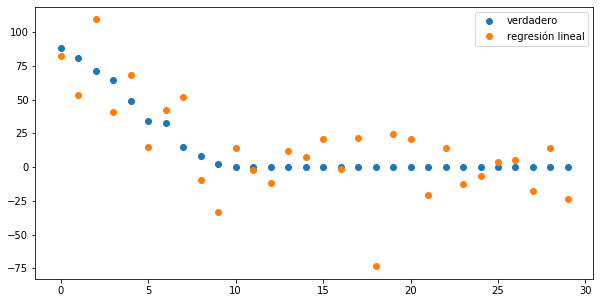

In [33]:
plt.figure(figsize=(10, 5))
coefficient_sorting = np.argsort(true_coefficient)[::-1] # lista[::-1] sirve para darle la vuelta a lista
plt.plot(true_coefficient[coefficient_sorting], "o", label="verdadero")
plt.plot(linear_regression.coef_[coefficient_sorting], "o", label="regresión lineal")

plt.legend()

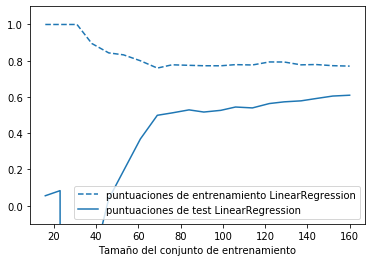

In [34]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="puntuaciones de entrenamiento " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="puntuaciones de test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()    
plot_learning_curve(LinearRegression(), X, y)

## Regresión de cresta (*Ridge Regression*, penalización L2)

**El estimador de cresta (``Ridge``)** es una regularización simple (llamada regularización L2) para el modelo LinearRegression. En particular, tiene el beneficio de no ser más costoso computacionalmente que la estimación basada en mínimos cuadrados.

$$ \text{min}_{\mathbf{w},b}  \sum_i || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_2^2$$ 

La cantidad de regularización se ajusta a través del parámetro `alpha` del modelo Ridge.

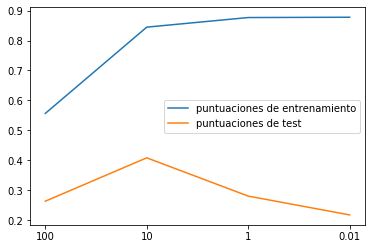

In [35]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="puntuaciones de entrenamiento")
plt.plot(test_scores, label="puntuaciones de test")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")

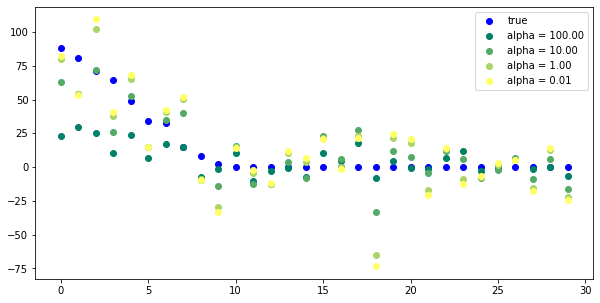

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([100, 10, 1, .01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

Ajustar `alpha` es muy importante para el rendimiento del modelo.

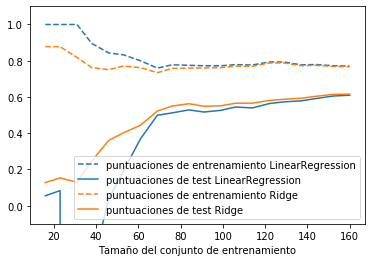

In [37]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)

## Lasso (penalización L1)
**El estimador ``Lasso``** es útil para conseguir imponer dispersión en los coeficientes. En otras palabras, se debería preferir esta penalización si creemos que muchas de las características no son relevantes. Se consigue a través de la regularización L1.

$$ \text{min}_{\mathbf{w}, b} \sum_i \frac{1}{2} || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_1$$ 

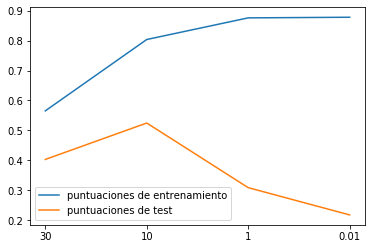

In [38]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, .01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso
plt.figure()
plt.plot(training_scores, label="puntuaciones de entrenamiento")
plt.plot(test_scores, label="puntuaciones de test")
plt.xticks(range(4), [30, 10, 1, .01])
plt.legend(loc="best")

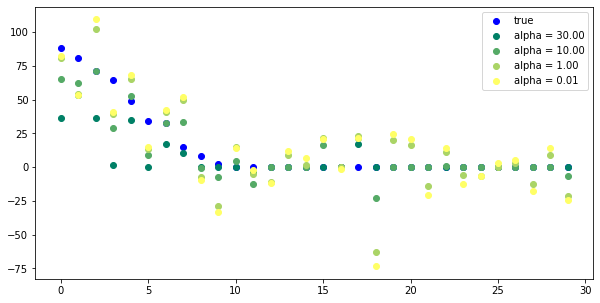

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([30, 10, 1, .01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

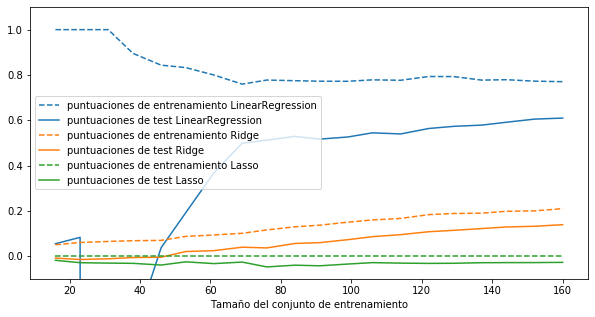

In [45]:
plt.figure(figsize=(10, 5))
plot_learning_curve(LinearRegression(n_jobs=2), X, y)
plot_learning_curve(Ridge(alpha=1000), X, y)
plot_learning_curve(Lasso(alpha=1000), X, y)

En lugar de escoger ``Ridge`` **o** ``Lasso``, puedes utilizar [ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), que considera ambas formas de regularización y proporciona un parámetro para sopesarlas. ``ElasticNet`` suele comportarse como el mejor de los dos modelos.


# Modelos lineales para clasificación

Todos los modelos lineales para clasificación aprenden un vector de coeficientes ``coef_`` y un valor de umbral ``intercept_`` para hacer predicciones mediante una combinación lineal de las características:
```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_ > 0
```
Como puedes ver, es muy similar a regresión.

De nuevo, la diferencia de los modelos lineales para clasificación es el tipo de regularización que imponen en ``coef_`` e ``intercept_``, para hay también diferencias menores en como se mide la bondad de ajuste con respecto al conjunto de entrenamiento (lo que se conoce también como función de pérdida).

Los dos modelos más comunes para clasificación lineal son la SVM lineal, implementada como ``LinearSVC`` y la regresión logística, ``LogisticRegression``.

## La influencia de C en ``LinearSVC``

El parámetro `C` de ``LinearSVC`` controla la regularización que sufre el modelo.

Valores bajos de `C` llevan a más regularización y a modelos más simples (permitiendo más errores), mientras que valores altos de `C` llevan a menos regularización y a modelos más forzados a intentar clasificar todo correctamente.

C:\Users\nicoc\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\nicoc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


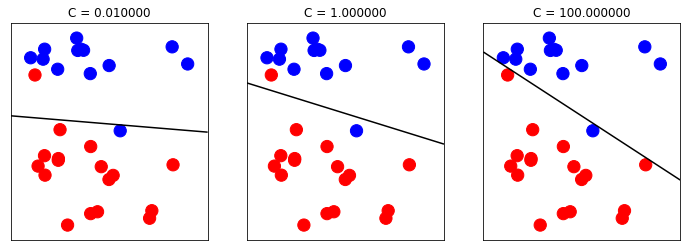

In [13]:
from figures import plot_linear_svc_regularization
plot_linear_svc_regularization()

De forma similar a la distinción Ridge/Lasso, puedes ajustar el parámetro `penalty` a 'l1' para forzar dispersión en los coeficientes (similar a Lasso) o 'l2' para forzar coeficientes más pequeños (similar a Ridge).

## Clasificación multi-clase lineal

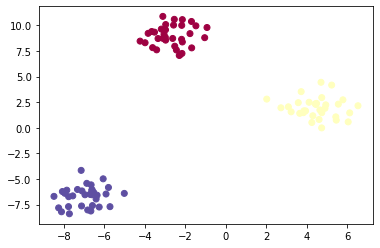

In [20]:
from sklearn.datasets import make_blobs
plt.figure()
X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.get_cmap("Spectral")(y / 2.));

In [15]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


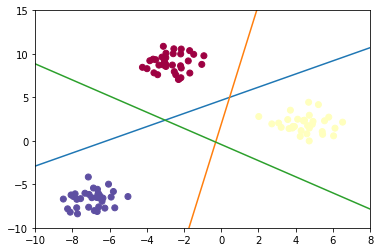

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.get_cmap("Spectral")(y / 2.))
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8);

Los puntos se clasifican utilizando la estrategia `one-vs-rest` (también llamada `one-vs-all`), con la que asignamos un patrón de test a la clase cuyo modelo tiene más máxima certeza de clasificación (en el caso de la SVM, la máxima distancia con respecto al hiperplano separador).

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Utiliza ``LogisticRegression`` para clasificar el dataset de dígitos manuscritos y aplica búsqueda *grid* para ajustar el parámetro `C`.
      </li>
      <li>
      ¿Cómo piensas que cambiarán las curvas de aprendizaje anteriores cuando incrementes o decrementes `alpha`?
Prueba a hacerlo en el código y ver si tu intuición es correcta.
      </li>
    </ul>
</div>

In [24]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# Divide el dataset y realiza la búsqueda grid.
x_train, x_test, y_train, y_test = train_test_split(X_digits, y_digits)
params = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(n_jobs=2), param_grid=params, cv=5)
grid.fit(x_train, y_train)
grid.best_params_

{'C': 0.01}

In [25]:
grid.score(x_test, y_test)

0.9688888888888889